In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = '../examples/PyMPDATA_examples/Arabas_and_Farhat_2020/data/'

In [4]:
df = pd.DataFrame(columns=['advector', 'advectee', 'flux'])

In [9]:
# Load the data
data = []
for i in range(17):
    advector = np.load(data_dir + 'advector_' + str(i) + '.npy')
    advectee = np.load(data_dir + 'advectee_' + str(i) + '.npy')
    flux = np.load(data_dir + 'corrective_flux_' + str(i) + '.npy')
    data.append((advector, advectee, flux))


In [14]:
data[0]

(array([       nan, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399, 0.03378399, 0.03378399, 0.03378399,
        0.03378399, 0.03378399,        nan]),
 array([99.60079893, 99.60079893, 99.60079893, 99.60079893, 99.60079893,
        99.60079893, 99.60079893, 99.60079893, 99.60079893, 99.60079893,
        99.60079893, 99.60079893, 99.60079893, 99.60079893, 99.60079893,
        99.60079893, 99.60079893, 96.62221125, 88.19297639, 75.09185429,
        59.89158235, 42.08549337, 18.66600857, 12.26970178,  0.        ,
         0.        ,  0.        ,  0.        

In [33]:
stencils= []
stencil_length = 3
for i in range(17):
    advector, advectee, flux = data[i]
    for j in range(1, len(data[i][1])):
        print(f"i: {i}, j: {j}, {list(range(j-1, j+2))}, {list(range(j-1, j+1))}, {j-1}")
        advectee_stencil = advectee[j-1:j+2]
        advector_stencil = advector[j-1:j+1]
        flux_stencil = flux[j-1]
        if np.isnan(advectee_stencil).any() or np.isnan(advector_stencil).any() or np.isnan(flux_stencil).any():
            continue
        try:
            assert advectee_stencil.shape[0] == stencil_length
            assert advector_stencil.shape[0] == stencil_length -1
        except:
            print(advectee_stencil.shape[0], advector_stencil.shape[0])
            print(advectee_stencil)
            print(advector_stencil)
            print(flux_stencil)
            print()
            continue
        # if any of the values are nan, skip this stencil
        input_stencil = np.concatenate((advector_stencil, advectee_stencil), axis=0)
        
        stencils.append((input_stencil, flux_stencil))

i: 0, j: 1, [0, 1, 2], [0, 1], 0
i: 0, j: 2, [1, 2, 3], [1, 2], 1
i: 0, j: 3, [2, 3, 4], [2, 3], 2
i: 0, j: 4, [3, 4, 5], [3, 4], 3
i: 0, j: 5, [4, 5, 6], [4, 5], 4
i: 0, j: 6, [5, 6, 7], [5, 6], 5
i: 0, j: 7, [6, 7, 8], [6, 7], 6
i: 0, j: 8, [7, 8, 9], [7, 8], 7
i: 0, j: 9, [8, 9, 10], [8, 9], 8
i: 0, j: 10, [9, 10, 11], [9, 10], 9
i: 0, j: 11, [10, 11, 12], [10, 11], 10
i: 0, j: 12, [11, 12, 13], [11, 12], 11
i: 0, j: 13, [12, 13, 14], [12, 13], 12
i: 0, j: 14, [13, 14, 15], [13, 14], 13
i: 0, j: 15, [14, 15, 16], [14, 15], 14
i: 0, j: 16, [15, 16, 17], [15, 16], 15
i: 0, j: 17, [16, 17, 18], [16, 17], 16
i: 0, j: 18, [17, 18, 19], [17, 18], 17
i: 0, j: 19, [18, 19, 20], [18, 19], 18
i: 0, j: 20, [19, 20, 21], [19, 20], 19
i: 0, j: 21, [20, 21, 22], [20, 21], 20
i: 0, j: 22, [21, 22, 23], [21, 22], 21
i: 0, j: 23, [22, 23, 24], [22, 23], 22
i: 0, j: 24, [23, 24, 25], [23, 24], 23
i: 0, j: 25, [24, 25, 26], [24, 25], 24
i: 0, j: 26, [25, 26, 27], [25, 26], 25
i: 0, j: 27, [26, 27, 28]

In [34]:
stencils

[(array([3.37839907e-02, 3.37839907e-02, 9.96007989e+01, 9.96007989e+01,
         9.96007989e+01]),
  0.0),
 (array([3.37839907e-02, 3.37839907e-02, 9.96007989e+01, 9.96007989e+01,
         9.96007989e+01]),
  0.0),
 (array([3.37839907e-02, 3.37839907e-02, 9.96007989e+01, 9.96007989e+01,
         9.96007989e+01]),
  0.0),
 (array([3.37839907e-02, 3.37839907e-02, 9.96007989e+01, 9.96007989e+01,
         9.96007989e+01]),
  0.0),
 (array([3.37839907e-02, 3.37839907e-02, 9.96007989e+01, 9.96007989e+01,
         9.96007989e+01]),
  0.0),
 (array([3.37839907e-02, 3.37839907e-02, 9.96007989e+01, 9.96007989e+01,
         9.96007989e+01]),
  8.755788960011078e-17),
 (array([3.37839907e-02, 3.37839907e-02, 9.96007989e+01, 9.96007989e+01,
         9.96007989e+01]),
  0.0),
 (array([3.37839907e-02, 3.37839907e-02, 9.96007989e+01, 9.96007989e+01,
         9.96007989e+01]),
  0.0),
 (array([3.37839907e-02, 3.37839907e-02, 9.96007989e+01, 9.96007989e+01,
         9.96007989e+01]),
  0.0),
 (array([3

In [35]:
df = pd.DataFrame(stencils, columns=['input', 'flux'])


In [36]:
df

,input,flux
0,"[0.033783990656690605, 0.033783990656690605, 9...",0.000000e+00
1,"[0.033783990656690605, 0.033783990656690605, 9...",0.000000e+00
2,"[0.033783990656690605, 0.033783990656690605, 9...",0.000000e+00
3,"[0.033783990656690605, 0.033783990656690605, 9...",0.000000e+00
4,"[0.033783990656690605, 0.033783990656690605, 9...",0.000000e+00
...,...,...
707,"[0.5337839906564663, 0.033783990656690605, 0.0...",-9.444465e-16
708,"[0.033783990656690605, 0.033783990656690605, 1...",5.583847e-17
709,"[0.033783990656690605, 0.033783990656690605, 0...",0.000000e+00
710,"[0.033783990656690605, 0.033783990656690605, 0...",0.000000e+00


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
model = keras.Sequential()
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [49]:
X = np.array([x[0] for x in stencils])
y = np.array([x[1] for x in stencils])


(array([  1.,   0.,   0.,   0.,   2.,   5.,  16.,  47.,  52., 589.]),
 array([-2.84690853, -2.55810773, -2.26930693, -1.98050612, -1.69170532,
        -1.40290451, -1.11410371, -0.82530291, -0.5365021 , -0.2477013 ,
         0.0410995 ]),
 <BarContainer object of 10 artists>)

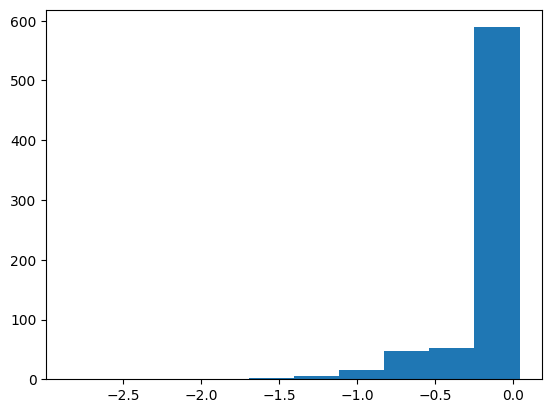

In [52]:
# histogram of y
plt.hist(y)

In [50]:
history = model.fit(X, y, epochs=100)

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 128.0777
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 26.9255
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 7.8904
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 3.8614
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 1.6986
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6247
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1430
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0616
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0372
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0290
Epoch 11/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 12/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 13/100
23/23 [==============

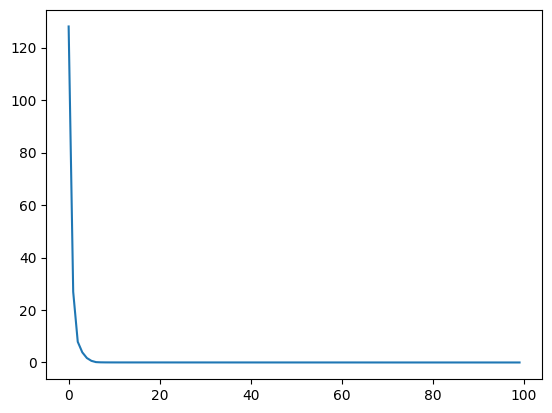

In [51]:
plt.plot(history.history['loss'])

23/23 [==============================] - 0s 972us/step


(array([  1.,   1.,   1.,   4.,   7.,  18.,  41.,  43.,  22., 574.]),
 array([-2.14449763, -1.91997802, -1.69545841, -1.4709388 , -1.24641919,
        -1.02189958, -0.79737991, -0.5728603 , -0.34834066, -0.12382104,
         0.10069858]),
 <BarContainer object of 10 artists>)

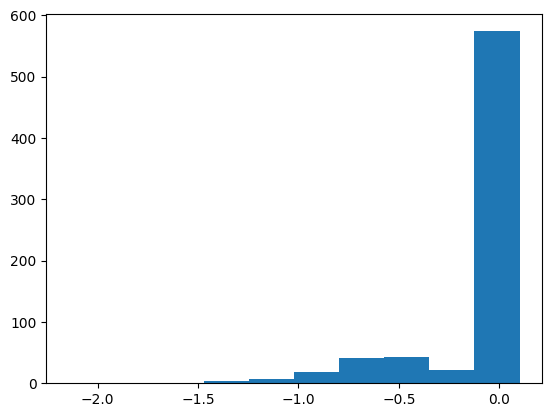

In [53]:
outputs = model.predict(X)
plt.hist(outputs)